In [858]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [859]:
img = cv.imread('foreground/fg-9.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [860]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)


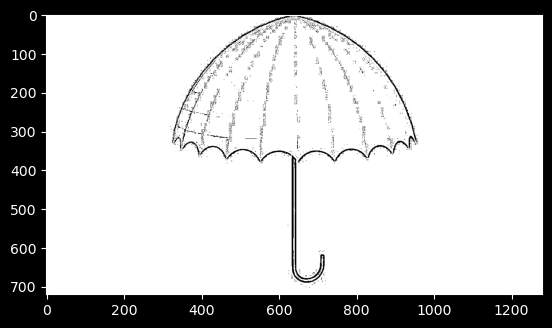

In [861]:
plt.imshow(binary_mask, cmap='gray')

In [862]:
binary_mask = cv.bitwise_not(binary_mask)

In [863]:
cv.fastNlMeansDenoising(binary_mask, binary_mask, 35, 10, 25)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [864]:
binary_mask = cv.erode(binary_mask, (17,17), iterations=1)
# binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

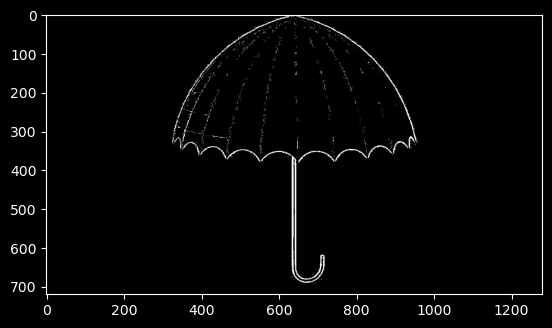

In [865]:
plt.imshow(binary_mask, cmap='gray')


In [866]:
binary_mask = cv.bitwise_not(binary_mask)

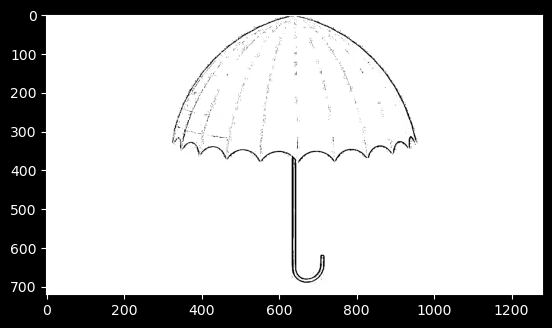

In [867]:
plt.imshow(binary_mask, cmap='gray')

In [868]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [869]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [870]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [871]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[ 8.56615312e-01,  7.96252983e-02,  1.84758594e-03,
          2.86576133e-02,  3.32541904e-02,  1.07976046e+01,
          2.55000000e+02,  6.13937341e+01,  1.30663549e+01,
          2.55000000e+02,  2.53726723e+02,  7.68265306e+01,
          2.35297194e+02,  1.06367985e+02,  1.16624728e+01,
          2.54175815e+02,  6.55336952e+01,  1.92354546e+01,
          2.53755120e+02,  2.51634611e+02,  9.59884659e-01,
         -4.54747351e-13,  4.73894547e-01, -4.54747351e-13,
          9.99999999e-03, -1.81898940e-12,  4.73894547e-01,
         -1.81898940e-12,  2.49453110e-01,  1.17968250e+00,
          4.54747351e-13,  6.15362893e-02,  4.54747351e-13,
          1.00000000e-02,  0.00000000e+00,  6.15362893e-02,
          0.00000000e+00,  1.85222778e+00,  1.63356047

In [872]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [873]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

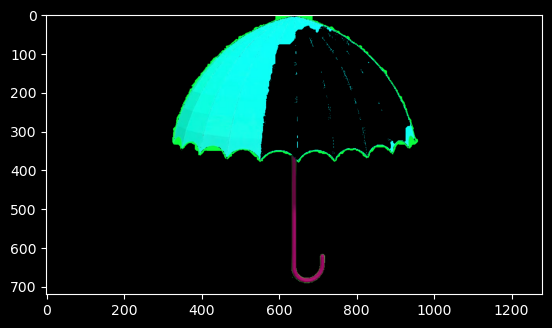

In [874]:
plt.imshow(segmented_image)

In [875]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [876]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

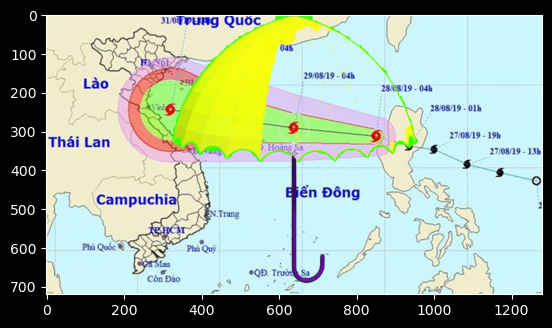

In [877]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)